In [1]:
import numpy as np
import pandas as pd

## Creating Dataframes
- From scratch
- From other collections
- From Files
- From SQL Queries

In [2]:
# DataFrame from scratch
fruits = pd.DataFrame()
print(type(fruits))
fruits

<class 'pandas.core.frame.DataFrame'>


""


In [3]:
# Column access with dot notation
# Column access with bracket notation 
# When we create a new column, we'll use bracket notation
fruits["fruits"] = ["kiwi", "mango", "guava"]
fruits["quantity"] = [12, 4, 2]
fruits

,fruits,quantity
0,kiwi,12
1,mango,4
2,guava,2


In [4]:
# Resetting a column to be the index
fruits = fruits.set_index("fruits")
fruits

,quantity
fruits,
kiwi,12
mango,4
guava,2


In [5]:
# Go back to the default numeric index
fruits = fruits.reset_index()
fruits

,fruits,quantity
0,kiwi,12
1,mango,4
2,guava,2


In [6]:
# DataFrame from List of Lists or Array of Arrays
tic_tac_toe = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
df = pd.DataFrame(tic_tac_toe)
df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [7]:
df.index = ["a", "b", "c"]
df.columns = ["X", "Y", "Z"]
df

,X,Y,Z
a,1,2,3
b,4,5,6
c,7,8,9


In [8]:
df.index = range(1, 4)
df

,X,Y,Z
1,1,2,3
2,4,5,6
3,7,8,9


In [9]:
# DataFrame from List of dictionaries
ingredients = [
    {
        "name": "sweet onion",
        "quantity": 1,
        "price": 0.89
    },
    {
        "name": "avocado",
        "quantity": 5,
        "price": 1
    },
    {
        "name": "serrano peppers",
        "quantity": 2,
        "price": .25
    },
    {
        "name": "lime",
        "quantity": 2,
        "price": .10
    }
]

guacamole = pd.DataFrame(ingredients)
guacamole

,name,quantity,price
0,sweet onion,1,0.89
1,avocado,5,1.00
2,serrano peppers,2,0.25
3,lime,2,0.10


In [10]:
## Now let's determine how much this guacamole recipe will cost to make
guacamole["item_total"] = guacamole.quantity * guacamole.price

## .sum the item_total
guacamole["item_total"].sum()

6.59

In [11]:
# DataFrame from Dictionaries containing lists
scales = {
    "note_number": [1, 2, 3, 4, 5, 6, 7, 8],
    "c_major_scale": ["c", "d", "e", "f", "g", "a", "b", "c"],
    "d_major_scale": ["D", "E", "F♯", "G", "A", "B", "C♯", "D"],
    "b_flat_major_scale": ["B♭", "C", "D", "E♭", "F", "G", "A", "B♭"]
}

scales = pd.DataFrame(scales)

scales.c_major_scale = scales.c_major_scale.str.upper()
scales

,note_number,c_major_scale,d_major_scale,b_flat_major_scale
0,1,C,D,B♭
1,2,D,E,C
2,3,E,F♯,D
3,4,F,G,E♭
4,5,G,A,F
5,6,A,B,G
6,7,B,C♯,A
7,8,C,D,B♭


In [12]:
# DataFrame from a .CSV file
quotes = pd.read_csv("quotes.csv")
quotes

,quote,author
0,"To go fast, go alone. To go far, go together",African Proverb
1,"In fact, the only way to manage stress is to b...",anomymous
2,Predispose yourself to practice,anonymous
3,The secret to building great products is not c...,Kathy Sierra
4,Writing is Nature's way of exposing how sloppy...,Guindon
5,The biggest issue on software teams is making ...,Martin Fowler
6,Promise me you'll always remember: you're brav...,Winnie the Pooh
7,The first rule of style is to have something t...,George Pólya
8,It's more fun to talk with someone who doesn't...,Winnie the Pooh
9,You don't start out writing good stuff. You st...,Octavia Butler


In [13]:
# DataFrame from a .json file

more_quotes = pd.read_json("more_quotes.json")
more_quotes

,quote,author
0,"In many cases, the more you try to compete, th...",Kathy Sierra
1,Median is safe when you could use mean. Median...,Maggie Giust
2,"If you get, give. If you learn, teach",Maya Angelou
3,"It's tough to make predictions, especially abo...",Yogi Berra


In [14]:
## Create a DataFrame from a SQL Query

# 1st step to having pandas get SQL results
# 1st step = all the right installs w/ python environment
# 2nd step = author syntactically correct SQL
# 3rd step = create a connection string for pandas (contains your hostname, username, password)
# 4th step = put everything together with pd.read_sql() and we get a dataframe

# mysql+pymysql://codeup:p@assw0rd@123.123.123.123/some_db

from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [15]:
query = """SELECT * FROM salaries ORDER BY salary DESC LIMIT 10"""
df = pd.read_sql(query, url)
df

,emp_no,salary,from_date,to_date
0,43624,158220,2002-03-22,9999-01-01
1,43624,157821,2001-03-22,2002-03-22
2,254466,156286,2001-08-04,9999-01-01
3,47978,155709,2002-07-14,9999-01-01
4,253939,155513,2002-04-11,9999-01-01
5,109334,155377,2000-02-12,2001-02-11
6,109334,155190,2002-02-11,9999-01-01
7,109334,154888,2001-02-11,2002-02-11
8,109334,154885,1999-02-12,2000-02-12
9,80823,154459,2002-02-22,9999-01-01


In [16]:
sql = """SHOW TABLES"""
pd.read_sql(sql, url)

,Tables_in_employees
0,current_dept_emp
1,departments
2,dept_emp
3,dept_emp_latest_date
4,dept_manager
5,employees
6,employees_with_departments
7,salaries
8,titles


## Aggregating DataFrame Values



In [17]:
df.describe()

,emp_no,salary
count,10.000000,10.000000
mean,116179.000000,155834.800000
std,77973.219944,1259.358549
min,43624.000000,154459.000000
25%,56189.250000,154963.500000
50%,109334.000000,155445.000000
75%,109334.000000,156141.750000
max,254466.000000,158220.000000


In [18]:
df.salary.min()

154459

In [19]:
# .agg take a list of strings of aggregate function names
# .min, .max, .mean
# See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html
df.salary.agg(["min", "max", "mean"])

min     154459.0
max     158220.0
mean    155834.8
Name: salary, dtype: float64

## Grouping with `.groupby`

In [20]:
grouped_by_employee = df.groupby("emp_no")
type(grouped_by_employee)

pandas.core.groupby.generic.DataFrameGroupBy

In [21]:
# group by employee_no
# show only the salary column, and return the maximum salary of that emp_no
grouped_by_employee.salary.max()

emp_no
43624     158220
47978     155709
80823     154459
109334    155377
253939    155513
254466    156286
Name: salary, dtype: int64

In [22]:
# Get the number of salaries that employee has had (since these are historic)
grouped_by_employee.salary.count()

emp_no
43624     2
47978     1
80823     1
109334    4
253939    1
254466    1
Name: salary, dtype: int64

In [23]:
grouped_by_employee.describe()

salary                                                                  \
        count      mean         std       min        25%       50%        75%   
emp_no                                                                          
43624     2.0  158020.5  282.135606  157821.0  157920.75  158020.5  158120.25   
47978     1.0  155709.0         NaN  155709.0  155709.00  155709.0  155709.00   
80823     1.0  154459.0         NaN  154459.0  154459.00  154459.0  154459.00   
109334    4.0  155085.0  241.590563  154885.0  154887.25  155039.0  155236.75   
253939    1.0  155513.0         NaN  155513.0  155513.00  155513.0  155513.00   
254466    1.0  156286.0         NaN  156286.0  156286.00  156286.0  156286.00   

                  
             max  
emp_no            
43624   158220.0  
47978   155709.0  
80823   154459.0  
109334  155377.0  
253939  155513.0  
254466  156286.0

## Concatenating dataframes

In [24]:
quotes

,quote,author
0,"To go fast, go alone. To go far, go together",African Proverb
1,"In fact, the only way to manage stress is to b...",anomymous
2,Predispose yourself to practice,anonymous
3,The secret to building great products is not c...,Kathy Sierra
4,Writing is Nature's way of exposing how sloppy...,Guindon
5,The biggest issue on software teams is making ...,Martin Fowler
6,Promise me you'll always remember: you're brav...,Winnie the Pooh
7,The first rule of style is to have something t...,George Pólya
8,It's more fun to talk with someone who doesn't...,Winnie the Pooh
9,You don't start out writing good stuff. You st...,Octavia Butler


In [25]:
more_quotes

,quote,author
0,"In many cases, the more you try to compete, th...",Kathy Sierra
1,Median is safe when you could use mean. Median...,Maggie Giust
2,"If you get, give. If you learn, teach",Maya Angelou
3,"It's tough to make predictions, especially abo...",Yogi Berra


In [26]:
# con + cat + e + nate
all_quotes = pd.concat([quotes, more_quotes], ignore_index=True)
all_quotes

,quote,author
0,"To go fast, go alone. To go far, go together",African Proverb
1,"In fact, the only way to manage stress is to b...",anomymous
2,Predispose yourself to practice,anonymous
3,The secret to building great products is not c...,Kathy Sierra
4,Writing is Nature's way of exposing how sloppy...,Guindon
5,The biggest issue on software teams is making ...,Martin Fowler
6,Promise me you'll always remember: you're brav...,Winnie the Pooh
7,The first rule of style is to have something t...,George Pólya
8,It's more fun to talk with someone who doesn't...,Winnie the Pooh
9,You don't start out writing good stuff. You st...,Octavia Butler


In [27]:
all_quotes = all_quotes.reset_index()
all_quotes

,index,quote,author
0,0,"To go fast, go alone. To go far, go together",African Proverb
1,1,"In fact, the only way to manage stress is to b...",anomymous
2,2,Predispose yourself to practice,anonymous
3,3,The secret to building great products is not c...,Kathy Sierra
4,4,Writing is Nature's way of exposing how sloppy...,Guindon
5,5,The biggest issue on software teams is making ...,Martin Fowler
6,6,Promise me you'll always remember: you're brav...,Winnie the Pooh
7,7,The first rule of style is to have something t...,George Pólya
8,8,It's more fun to talk with someone who doesn't...,Winnie the Pooh
9,9,You don't start out writing good stuff. You st...,Octavia Butler


In [28]:
# concatenating strings
"con" + "cat" + "e" + "nation"

'concatenation'

In [29]:
# concatenate lists to get one big list
[1, 2] + [3, 4]

[1, 2, 3, 4]

In [30]:
quotes["import_type"] = "CSV"
quotes

,quote,author,import_type
0,"To go fast, go alone. To go far, go together",African Proverb,CSV
1,"In fact, the only way to manage stress is to b...",anomymous,CSV
2,Predispose yourself to practice,anonymous,CSV
3,The secret to building great products is not c...,Kathy Sierra,CSV
4,Writing is Nature's way of exposing how sloppy...,Guindon,CSV
5,The biggest issue on software teams is making ...,Martin Fowler,CSV
6,Promise me you'll always remember: you're brav...,Winnie the Pooh,CSV
7,The first rule of style is to have something t...,George Pólya,CSV
8,It's more fun to talk with someone who doesn't...,Winnie the Pooh,CSV
9,You don't start out writing good stuff. You st...,Octavia Butler,CSV


In [31]:
more_quotes

,quote,author
0,"In many cases, the more you try to compete, th...",Kathy Sierra
1,Median is safe when you could use mean. Median...,Maggie Giust
2,"If you get, give. If you learn, teach",Maya Angelou
3,"It's tough to make predictions, especially abo...",Yogi Berra


In [32]:
pd.concat([quotes, more_quotes])

,quote,author,import_type
0,"To go fast, go alone. To go far, go together",African Proverb,CSV
1,"In fact, the only way to manage stress is to b...",anomymous,CSV
2,Predispose yourself to practice,anonymous,CSV
3,The secret to building great products is not c...,Kathy Sierra,CSV
4,Writing is Nature's way of exposing how sloppy...,Guindon,CSV
5,The biggest issue on software teams is making ...,Martin Fowler,CSV
6,Promise me you'll always remember: you're brav...,Winnie the Pooh,CSV
7,The first rule of style is to have something t...,George Pólya,CSV
8,It's more fun to talk with someone who doesn't...,Winnie the Pooh,CSV
9,You don't start out writing good stuff. You st...,Octavia Butler,CSV


## Merging Dataframes

In [33]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [34]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [35]:
# pd.merge(left, right, how="type_of_join", left_on="key from the left", right_on="key from the right df")
# LEFT JOIN means keep all the USERS even if they don't have a role...
users_with_roles = pd.merge(users, roles, left_on='role_id', right_on='id', how='left')
users_with_roles

,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,3.0,3.0,reviewer
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


In [36]:
# RIGHT JOIN == show all roles, even if they don't have a user attached
roles_with_users = pd.merge(users, roles, left_on='role_id', right_on='id', how='right')
roles_with_users

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [37]:
# INNER JOIN means All the records from A that correspond with B. no nulls
only_users_with_roles_and_roles_with_users = pd.merge(users, roles, left_on='role_id', right_on='id', how='inner')
only_users_with_roles_and_roles_with_users

,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1,admin
1,2,joe,2.0,2,author
2,3,sally,3.0,3,reviewer
3,4,adam,3.0,3,reviewer


## .Crosstab

In [38]:
np.random.seed(123)

students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas',
            'Marie', 'Albert', 'Richard', 'Isaac', 'Alan']

# randomly generate scores for each student for each subject
# note that all the values need to have the same length here
math_grades = np.random.randint(low=60, high=100, size=len(students))
english_grades = np.random.randint(low=60, high=100, size=len(students))
reading_grades = np.random.randint(low=60, high=100, size=len(students))

df = pd.DataFrame({'name': students,
                   'math': math_grades,
                   'english': english_grades,
                   'reading': reading_grades,
                   'classroom': np.random.choice(['A', 'B'], len(students))})

df['passing_math'] = df.math >= 70


In [39]:
df

,name,math,english,reading,classroom,passing_math
0,Sally,62,85,80,A,False
1,Jane,88,79,67,B,True
2,Suzie,94,74,95,A,True
3,Billy,98,96,88,B,True
4,Ada,77,92,98,A,True
5,John,79,76,93,B,True
6,Thomas,82,64,81,A,True
7,Marie,93,63,90,A,True
8,Albert,92,62,87,A,True
9,Richard,69,80,94,A,False


In [40]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html
# pd.crosstab(index, columns)

# By default computes a frequency table of the factors

# Show the number of students passing/failing math by their classroom.
pd.crosstab(df.passing_math, df.classroom)

classroom,A,B
passing_math,,
False,2,0
True,6,4


In [41]:
pd.crosstab(df.classroom, df.passing_math)

passing_math,False,True
classroom,,
A,2,6
B,0,4


In [42]:
# For an example using the pivot_table method, 
# we'll calculate the average math grade for the combination of classroom 
# and whether each student is passing or failing math.

# df.pivot_table(values=values_to_aggregate_w/_that_aggregation_fn, index=rows, columns=columns, aggfunc=)
df.pivot_table(values='math', index='classroom', columns='passing_math', aggfunc='mean')

passing_math,False,True
classroom,,
A,65.5,88.333333
B,NaN,89.250000


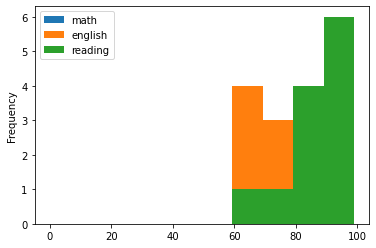

In [43]:
df.set_index('classroom').plot.hist()

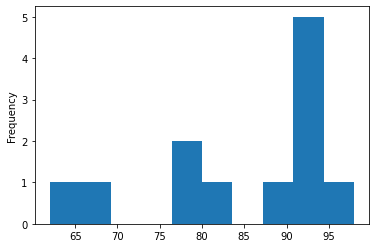

In [44]:
df.math.plot.hist()

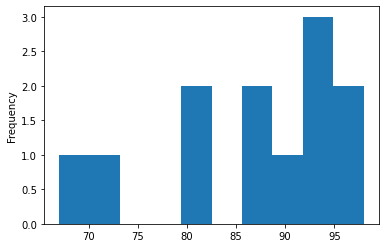

In [45]:
df.reading.plot.hist()

In [46]:
df

,name,math,english,reading,classroom,passing_math
0,Sally,62,85,80,A,False
1,Jane,88,79,67,B,True
2,Suzie,94,74,95,A,True
3,Billy,98,96,88,B,True
4,Ada,77,92,98,A,True
5,John,79,76,93,B,True
6,Thomas,82,64,81,A,True
7,Marie,93,63,90,A,True
8,Albert,92,62,87,A,True
9,Richard,69,80,94,A,False


In [47]:
def bump_grades(df):
    df.math = df.math + df.math * .2
    df.english = df.english + df.english * 0.12
    df.reading = df.reading * 2
    return df

In [48]:
df.pipe(bump_grades)

,name,math,english,reading,classroom,passing_math
0,Sally,74.4,95.20,160,A,False
1,Jane,105.6,88.48,134,B,True
2,Suzie,112.8,82.88,190,A,True
3,Billy,117.6,107.52,176,B,True
4,Ada,92.4,103.04,196,A,True
5,John,94.8,85.12,186,B,True
6,Thomas,98.4,71.68,162,A,True
7,Marie,111.6,70.56,180,A,True
8,Albert,110.4,69.44,174,A,True
9,Richard,82.8,89.60,188,A,False


In [49]:
def half_grades(df):
    df.math /= 2
    df.reading /= 2
    df.english /= 2
    return df


In [50]:
# Big idea behind pipe is we can chain functions together to make a pipeline.
df.pipe(bump_grades).pipe(half_grades)

,name,math,english,reading,classroom,passing_math
0,Sally,44.64,53.3120,160.0,A,False
1,Jane,63.36,49.5488,134.0,B,True
2,Suzie,67.68,46.4128,190.0,A,True
3,Billy,70.56,60.2112,176.0,B,True
4,Ada,55.44,57.7024,196.0,A,True
5,John,56.88,47.6672,186.0,B,True
6,Thomas,59.04,40.1408,162.0,A,True
7,Marie,66.96,39.5136,180.0,A,True
8,Albert,66.24,38.8864,174.0,A,True
9,Richard,49.68,50.1760,188.0,A,False


In [51]:
# this example, we bump the grades first, then we half the grades

# With function calls like this, we're reading from the right to the left...
# half_grades(bump_grades(df))

In [52]:
# w/ .pipe, we're applying functions to a dataframe from left to right
# df.pipe(bump_grades).pipe(half_grades)

In [53]:
df

,name,math,english,reading,classroom,passing_math
0,Sally,44.64,53.3120,160.0,A,False
1,Jane,63.36,49.5488,134.0,B,True
2,Suzie,67.68,46.4128,190.0,A,True
3,Billy,70.56,60.2112,176.0,B,True
4,Ada,55.44,57.7024,196.0,A,True
5,John,56.88,47.6672,186.0,B,True
6,Thomas,59.04,40.1408,162.0,A,True
7,Marie,66.96,39.5136,180.0,A,True
8,Albert,66.24,38.8864,174.0,A,True
9,Richard,49.68,50.1760,188.0,A,False


In [54]:
# .iloc is integer .location
starting_index = 0
ending_index = 3
df.iloc[starting_index:ending_index]

,name,math,english,reading,classroom,passing_math
0,Sally,44.64,53.3120,160.0,A,False
1,Jane,63.36,49.5488,134.0,B,True
2,Suzie,67.68,46.4128,190.0,A,True


In [55]:
# .iloc and .loc the bracket syntax starts w/ rows, then comma, then index
df.iloc[starting_index:ending_index, 0:3]

,name,math,english
0,Sally,44.64,53.3120
1,Jane,63.36,49.5488
2,Suzie,67.68,46.4128


In [56]:
# start w/ the 2nd column and go until the last column
df.iloc[starting_index:ending_index, 2:]

,english,reading,classroom,passing_math
0,53.3120,160.0,A,False
1,49.5488,134.0,B,True
2,46.4128,190.0,A,True


In [57]:
# range of named columns
# or range of named indexes
# .loc is inclusive because you're calling something by name
df.loc[:, "math":"classroom"]

,math,english,reading,classroom
0,44.64,53.3120,160.0,A
1,63.36,49.5488,134.0,B
2,67.68,46.4128,190.0,A
3,70.56,60.2112,176.0,B
4,55.44,57.7024,196.0,A
5,56.88,47.6672,186.0,B
6,59.04,40.1408,162.0,A
7,66.96,39.5136,180.0,A
8,66.24,38.8864,174.0,A
9,49.68,50.1760,188.0,A


In [58]:
# .loc is inclusive of both rows and columns 
df.loc[0:2, "math":"classroom"]

,math,english,reading,classroom
0,44.64,53.3120,160.0,A
1,63.36,49.5488,134.0,B
2,67.68,46.4128,190.0,A


In [59]:
df.iloc[0:2]

,name,math,english,reading,classroom,passing_math
0,Sally,44.64,53.3120,160.0,A,False
1,Jane,63.36,49.5488,134.0,B,True


In [60]:
# .T transpose
df.T

,0,1,2,3,4,5,6,7,8,9,10,11
name,Sally,Jane,Suzie,Billy,Ada,John,Thomas,Marie,Albert,Richard,Isaac,Alan
math,44.64,63.36,67.68,70.56,55.44,56.88,59.04,66.96,66.24,49.68,66.24,66.24
english,53.312,49.5488,46.4128,60.2112,57.7024,47.6672,40.1408,39.5136,38.8864,50.176,62.0928,38.8864
reading,160,134,190,176,196,186,162,180,174,188,186,144
classroom,A,B,A,B,A,B,A,A,A,A,B,A
passing_math,False,True,True,True,True,True,True,True,True,False,True,True
